In [1]:
# header files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Reading the synthetic data into pandas dataframe
dataset = pd.read_csv(r"datasets\function2.csv",delimiter=',')
X_dataset, Y_dataset = dataset["x"],dataset["y"]
range_min = math.floor(min(X_dataset))
range_max = math.ceil(max(X_dataset))

# separating the dataset into train/test/validation 
x_train = X_dataset[:math.floor(0.7*len(X_dataset))]
y_train = Y_dataset[:math.floor(0.7*len(X_dataset))]
x_valid = X_dataset[math.floor(0.7*len(X_dataset)):math.floor(0.8*len(X_dataset))]
y_valid = Y_dataset[math.floor(0.7*len(X_dataset)):math.floor(0.8*len(X_dataset))]
x_test = X_dataset[math.floor(0.8*len(X_dataset)):len(X_dataset)]
y_test = Y_dataset[math.floor(0.8*len(X_dataset)):len(X_dataset)]

# we will build the ML models using various sizes of training data and model complexity M 
training_size = [10,200]
M = [2,3,6,9]

In [16]:
# returns the Root mean squared error (ERMS) between the train, validation and test data and their predictions made by our model
# inputs : Dimension, size of training data, features of training data, target output of training data, regularization coefficient lamda 
def erms_error(D,N,x_train,y_train,lamda):
    I = np.identity(D)

    # generating Phi matrix by raising features from training data to 0-D
    Phi = np.zeros((N,D))
    for i in range(N):
        for j in range(D):
            Phi[i][j] = x_train[i]**j

    # computing optimal parameters w
    w = np.linalg.inv(Phi.transpose().dot(Phi)+lamda*I).dot(Phi.transpose().dot(y_train))
             
    # plotting the estimated function f_x and the data used for training
    print("\nPlot for training data size : "+str(N)+", and model complexity :"+str(D-1))
    x = np.linspace(range_min,range_max,100)
    f_x = 0
    for i in range(len(w)):
        f_x += (x**i)*w[i]
    plt.plot(x,f_x, 'r')
    plt.scatter(x_train, y_train ,label=["train"])
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

    # generating the estimated output for training data
    predicted = np.zeros(len(y_train))
    for i in range(len(y_train)):
        predicted[i] = 0
        for j in range(D):
            predicted[i] += (x_train[i]**j)*w[j]
    
    error_train = 0
    for i in range(len(y_train)):
        error_train += (predicted[i]-y_train[i])**2
    
    error_train /= len(y_train)
    
    # generating the estimated output for validation data
    predicted = np.zeros(len(y_valid))
    for i in range(len(y_valid)):
        predicted[i] = 0
        for j in range(D):
            predicted[i] += (x_valid[i+math.floor(0.7*len(X_dataset))]**j)*w[j]
    
    error_valid = 0
    for i in range(len(y_valid)):
        error_valid += (predicted[i]-y_valid[i+math.floor(0.7*len(X_dataset))])**2
    
    error_valid /= len(y_valid)
    
    # generating the estimated output for test data
    predicted = np.zeros(len(y_test))
    for i in range(len(y_test)):
        predicted[i] = 0
        for j in range(D):
            predicted[i] += (x_test[i+math.floor(0.8*len(X_dataset))]**j)*w[j]
            
    error_test = 0
    for i in range(len(y_test)):
        error_test += (predicted[i]-y_test[i+math.floor(0.8*len(X_dataset))])**2
    
    error_test /= len(y_test)
    return math.sqrt(error_train),math.sqrt(error_valid),math.sqrt(error_test)


Plot for training data size : 10, and model complexity :2


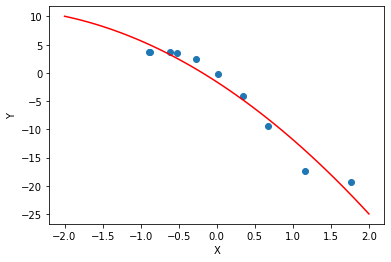


Plot for training data size : 10, and model complexity :3


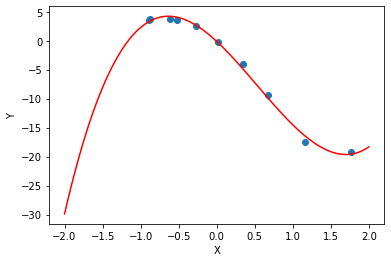


Plot for training data size : 10, and model complexity :6


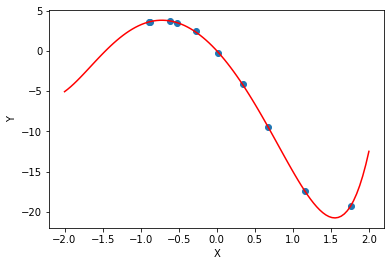


Plot for training data size : 10, and model complexity :9


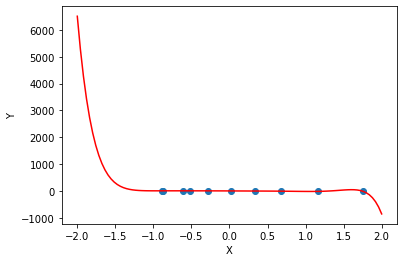


Plot for training data size : 200, and model complexity :2


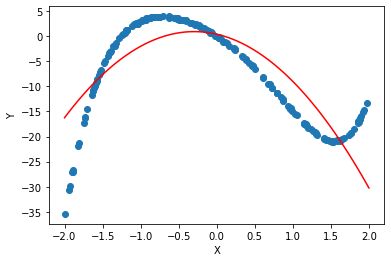


Plot for training data size : 200, and model complexity :3


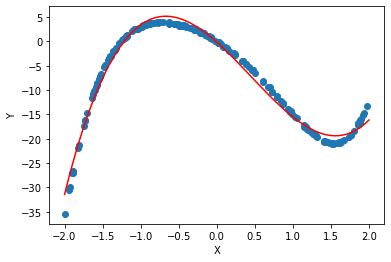


Plot for training data size : 200, and model complexity :6


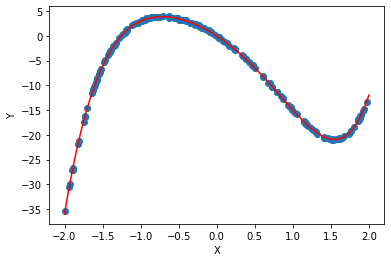


Plot for training data size : 200, and model complexity :9


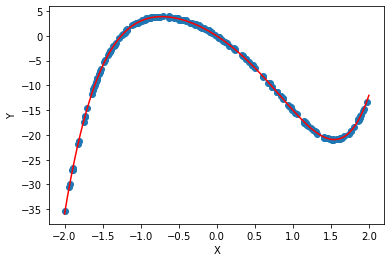

In [17]:
# regularization coefficient (keep 0 until overfitting is observed)
lamda = 0 
# array to store errors for different training data sizes and different model complexities
error_train = np.zeros((len(training_size),len(M)))
error_valid = np.zeros((len(training_size),len(M)))
error_test = np.zeros((len(training_size),len(M)))
for i in range(len(training_size)):
    # using only training_size[i] elements for training
    x_training = x_train[:training_size[i]]
    y_training = y_train[:training_size[i]]
    for j in range(len(M)):
        # building a model of complexity M[j]+1
        error_train[i][j], error_valid[i][j], error_test[i][j] = erms_error(M[j]+1,training_size[i],x_training,y_training,lamda)


Train data :
Plot of ERMS with training size 10 :


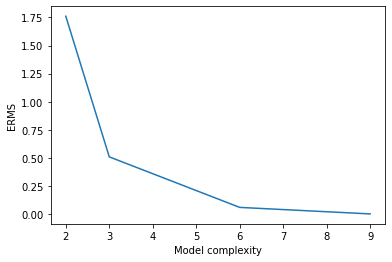

Plot of ERMS with training size 200 :


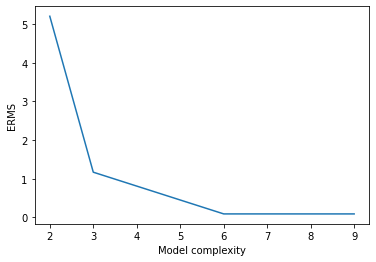


Validation data :
Plot of ERMS with training size 10 :


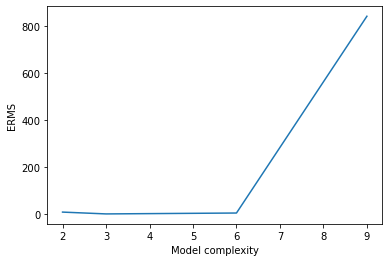

Plot of ERMS with training size 200 :


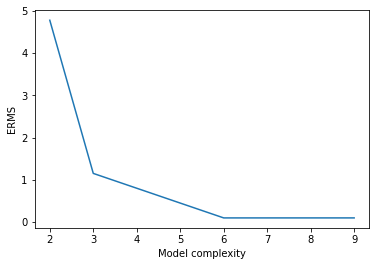


Test data :
Plot of ERMS with training size 10 :


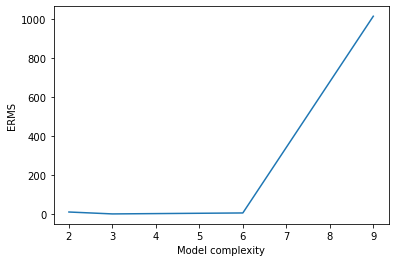

Plot of ERMS with training size 200 :


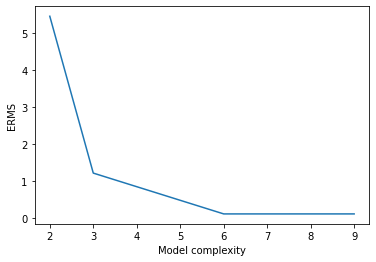

In [15]:
print("\nTrain data :")
for i in range(len(training_size)):  
    print("Plot of ERMS with training size " +str(training_size[i]) +" :")  
    plt.plot(M,error_train[i])
    plt.xlabel("Model complexity")
    plt.ylabel("ERMS")
    plt.show()
# we observe that the ERMS decreases with model complexity for training data irrespective of the size of training data
print("\nValidation data :")
for i in range(len(training_size)): 
    print("Plot of ERMS with training size " +str(training_size[i]) +" :")     
    plt.plot(M,error_valid[i])
    plt.xlabel("Model complexity")
    plt.ylabel("ERMS")
    plt.show()
print("\nTest data :")
for i in range(len(training_size)): 
    print("Plot of ERMS with training size " +str(training_size[i]) +" :")     
    plt.plot(M,error_test[i])
    plt.xlabel("Model complexity")
    plt.ylabel("ERMS")
    plt.show()
# for validation data and test data the ERMS decreases with model complexity only when we use enough data to train 
# when we have very less to train although the ERMS for train data reduces with model complexity but it increases for validation data and test data. This is due to overfitting. The model here represents the training data strictly and does not have the flexibility to estimate any data point other than that correctly. 